In [ ]:
#connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing
1. Import train and test datasets, combine them together and rename them as 'train'.

In [ ]:
from numpy import testing
from cycler import concat
import pandas as pd
import numpy as np
train1=pd.read_csv('/content/drive/MyDrive/zillow/Data_Science_ZExercise_TRAINING_CONFIDENTIAL1.csv',sep=',')
test1= pd.read_csv('/content/drive/MyDrive/zillow/Data_Science_ZExercise_TEST_CONFIDENTIAL2.csv',sep=',')
train= pd.concat([train1,test1],ignore_index= True)
print(train1.shape)
print(test1.shape)
print(train)

(11588, 24)
(4402, 24)
       PropertyID  SaleDollarCnt   TransDate  ...  BGMedIncome BGPctKids  BGMedAge
0        48648941       285000.0   5/23/2015  ...        42854    0.1924      48.6
1        48648982       309950.0   8/22/2015  ...        54013    0.3718      42.6
2        48649024       476000.0   8/27/2015  ...        56782    0.3207      40.7
3        48649040       324950.0    7/1/2015  ...        44200    0.3359      40.0
4        48649057       325000.0   6/20/2015  ...        65282    0.1633      44.4
...           ...            ...         ...  ...          ...       ...       ...
15985    49034257            NaN  12/16/2015  ...        26979    0.1317      48.5
15986    49101515            NaN   12/8/2015  ...        26979    0.1317      48.5
15987    49092758            NaN   10/6/2015  ...        26979    0.1317      48.5
15988    49034232            NaN  11/21/2015  ...        26979    0.1317      48.5
15989    49092730            NaN  10/31/2015  ...        26979  

2. Check for the columns 'Usecode' and 'censusblockgroup' with the unique value. \
Drop columns above and  with the column 'PropertyID' represents ID.

In [ ]:
# check columns with the unique value(2 columns)
for i in range(0,24,1):
  if len(np.unique(train.iloc[:,i]))==1:
    print(list(train)[i])
    print(np.unique(train.iloc[:,i]))
    
#delete 'PropertyID' + 2 columns
train = train.drop(['censusblockgroup'] , axis= 1)
train = train.drop(['Usecode'] , axis= 1)
train = train.drop(['PropertyID'] , axis= 1)
print(train.shape)

censusblockgroup
[5.3e+11]
Usecode
[9]
(15990, 21)


3. Check for the missing values (there are 5 columns have missing values). \
Use 0 to fill missing values in 'viewtype' and 'GarageSquareFeet' (NA means no view). \
Use the mode in each column to fill  'BGMedHomeValue', 'BGMedRent' and 'BGMedYearBuilt' columns. \
Then check again to make sure no missing value in the dataset.

In [ ]:
#missing value
train_na = (train.isnull().sum()/len(train))*100
print(train_na)

SaleDollarCnt         27.529706
TransDate              0.000000
ZoneCodeCounty         0.000000
BedroomCnt             0.000000
BathroomCnt            0.000000
FinishedSquareFeet     0.000000
GarageSquareFeet      24.884303
LotSizeSquareFeet      0.000000
StoryCnt               0.000000
BuiltYear              0.000000
ViewType              77.298311
Latitude               0.000000
Longitude              0.000000
BGMedHomeValue         0.081301
BGMedRent             22.476548
BGMedYearBuilt         1.932458
BGPctOwn               0.000000
BGPctVacant            0.000000
BGMedIncome            0.000000
BGPctKids              0.000000
BGMedAge               0.000000
dtype: float64


In [ ]:
#For viewtype,GarageSquareFeet, NA means no view, so use 0 to fill missiing value
train['ViewType'] = train['ViewType'].fillna(0)
train['GarageSquareFeet'] = train['GarageSquareFeet'].fillna(0)
#For BGMedHomeValue, BGMedRent, BGMedYearBuilt, fill with common value
train['BGMedHomeValue'] = train['BGMedHomeValue'].fillna(train['BGMedHomeValue'].mode()[0])
train['BGMedRent'] = train['BGMedRent'].fillna(train['BGMedRent'].mode()[0])
train['BGMedYearBuilt'] = train['BGMedYearBuilt'].fillna(train['BGMedYearBuilt'].mode()[0])

In [ ]:
#missing value check2
train_na = (train.isnull().sum()/len(train))*100
print(train_na)

SaleDollarCnt         27.529706
TransDate              0.000000
ZoneCodeCounty         0.000000
BedroomCnt             0.000000
BathroomCnt            0.000000
FinishedSquareFeet     0.000000
GarageSquareFeet       0.000000
LotSizeSquareFeet      0.000000
StoryCnt               0.000000
BuiltYear              0.000000
ViewType               0.000000
Latitude               0.000000
Longitude              0.000000
BGMedHomeValue         0.000000
BGMedRent              0.000000
BGMedYearBuilt         0.000000
BGPctOwn               0.000000
BGPctVacant            0.000000
BGMedIncome            0.000000
BGPctKids              0.000000
BGMedAge               0.000000
dtype: float64


# Data Analysis and Anomaly detection
Draw the historgarm to show distribution about SaleDollarCnt. \
Use heatmaps to find the top 10 strongest correlation features between SaleDollarCnt.  \
Apply the pairpot to show the top 4 correlated variables and check outliers. \
Then plot the boxplot for discrete distribution 'bathroomcnt' to show positive correlation to SaleDollarCnt.

count    1.158800e+04
mean     6.137157e+05
std      4.577593e+05
min      2.000000e+04
25%      3.550000e+05
50%      5.050000e+05
75%      7.150000e+05
max      7.880000e+06
Name: SaleDollarCnt, dtype: float64


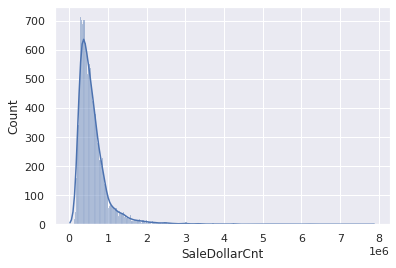

In [ ]:
import seaborn as sns
#Historgarm to show distribution about saledollar
print(train['SaleDollarCnt'].describe())
sns.histplot(data=train,x='SaleDollarCnt', kde=True)

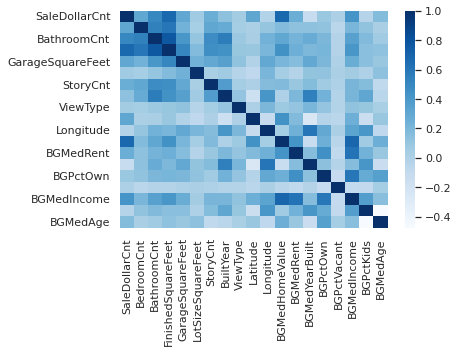

In [ ]:
#Heatmap to show correlation between all values
correl= train.corr()
heatm = sns.heatmap(correl,annot=False,cmap='Blues')

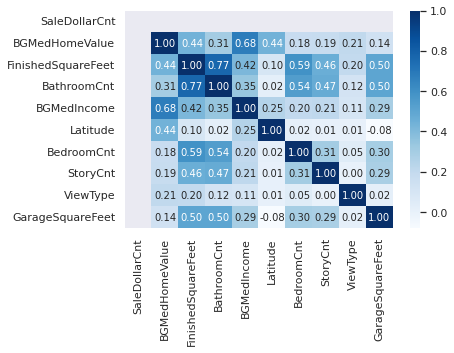

In [ ]:
#Heatmap to find the top 10 correlation between sale$
K=10
correl1 =correl.nlargest(K,'SaleDollarCnt')['SaleDollarCnt'].index
cm1 = np.corrcoef(train[correl1].values.T)
sns.set(font_scale = 1)
heatm1 = sns.heatmap(cm1,cbar= True,annot=True,cmap='Blues',fmt = '.2f',annot_kws={'size':10}, yticklabels=correl1.values, xticklabels=correl1.values )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


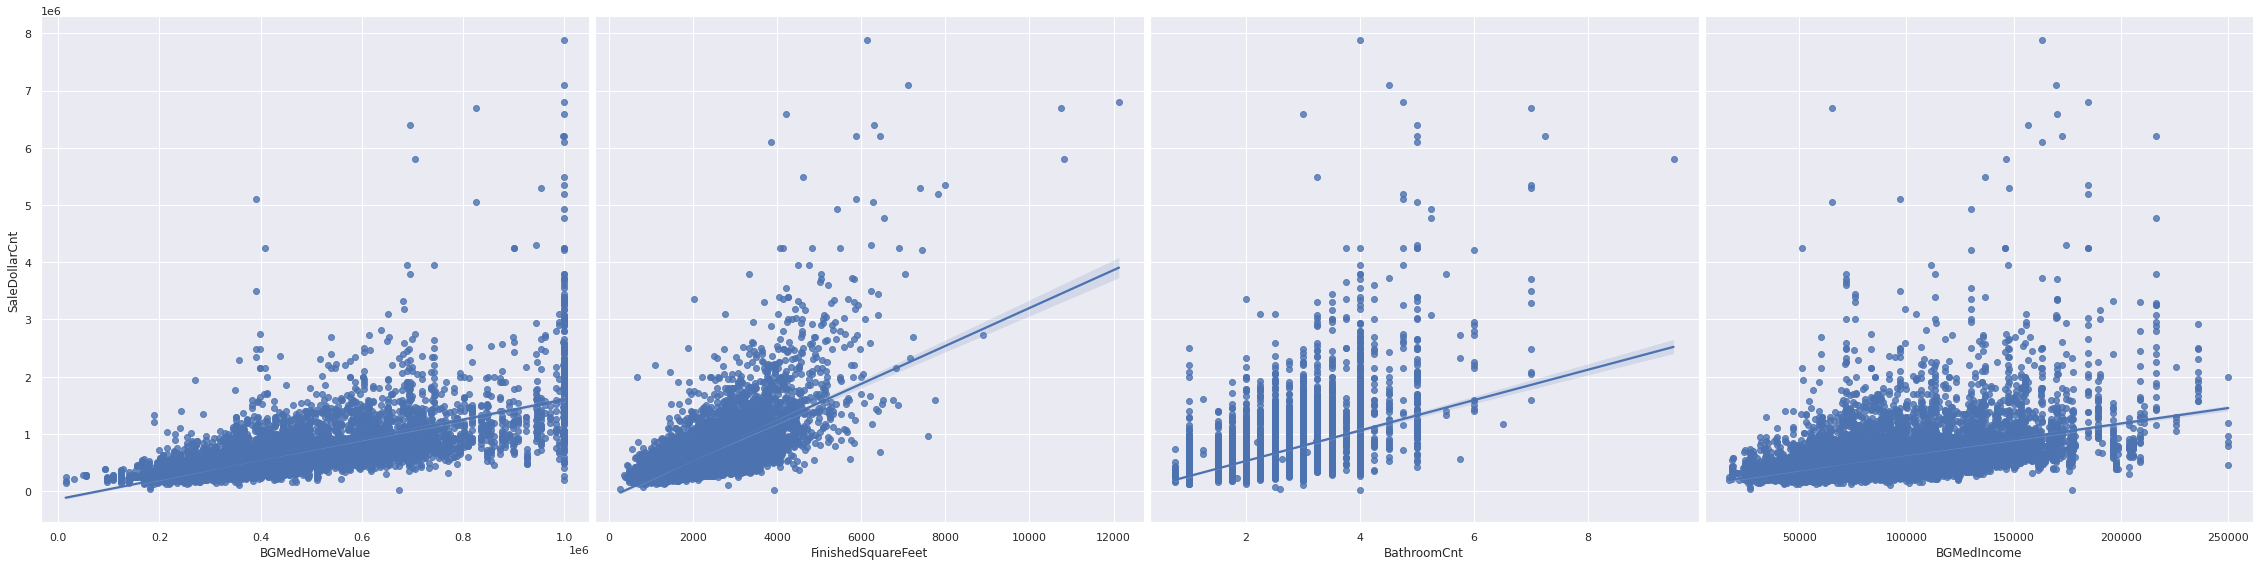

In [ ]:
#pairpot show the top 4 correlated variables and check outliers
sns.pairplot(data=train,x_vars=['BGMedHomeValue','FinishedSquareFeet','BathroomCnt','BGMedIncome'], y_vars=['SaleDollarCnt'],dropna=True, size=8, kind='reg')

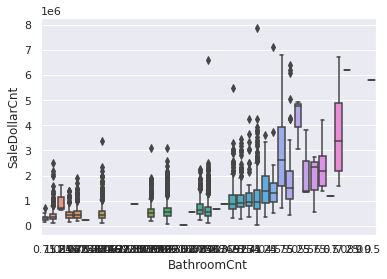

In [ ]:
#boxplot for bathroomcnt show positive correlation
sns.boxplot(x=train['BathroomCnt'], y=train['SaleDollarCnt'])

# Standardization and encode categorical features
Applied NLP word embedding algorithm instead of one-hot encoding to encode categorical features in case of the increase of data sparsity.  \
\
Standardize the other numerical columns to improve the quality of the dataset. \


In [ ]:

from sklearn import preprocessing
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
import tensorflow as tf
from collections import Counter
from google.colab import files


#Standardization(except for categorical columns*3 and y)
from sklearn.preprocessing import StandardScaler
clean= train.drop(['ZoneCodeCounty'], axis= 1)
clean= clean.drop(['TransDate'], axis= 1)
clean= clean.drop(['ViewType'], axis= 1)
clean= clean.drop(['SaleDollarCnt'], axis= 1)
print(train.shape)
print(clean.shape)
scaler = StandardScaler()
scaled_trained = pd.DataFrame(scaler.fit_transform(clean),columns = clean.columns)
print(scaled_trained.shape)

#Word embedding to encode categorical vector 'ZoneCodeCounty', 'TransDate' & 'ViewType'
for col in ('ZoneCodeCounty','TransDate','ViewType'):
    docs = np.asarray(train[col]).astype(np.str)
    vocab_size = len(docs) * 10
    encoded_docs = [one_hot(d, vocab_size) for d in docs]
    padded_docs = pad_sequences(encoded_docs, maxlen=1)
    model = Sequential()
    model.add(Embedding(vocab_size, 2, input_length=1))
    output = model(padded_docs).numpy().reshape(-1,2)
    output = pd.DataFrame(output)
    scaled_trained = pd.concat([scaled_trained, output], axis=1, ignore_index = True)

scaled_trained1 = pd.concat([scaled_trained, train['SaleDollarCnt']], axis=1, ignore_index = True)
print(scaled_trained1)

(15990, 21)
(15990, 17)
(15990, 17)
             0         1         2   ...        21        22        23
0      0.627547 -0.398333 -0.311886  ...  0.033343 -0.031342  285000.0
1     -0.518787 -0.398333 -0.024207  ...  0.033343 -0.031342  309950.0
2      0.627547 -1.503568 -0.045517  ...  0.033343 -0.031342  476000.0
3      0.627547 -0.122024  0.391329  ...  0.033343 -0.031342  324950.0
4      0.627547 -0.674642 -0.503672  ...  0.033343 -0.031342  325000.0
...         ...       ...       ...  ...       ...       ...       ...
15985 -0.518787 -0.398333 -0.823315  ...  0.033343 -0.031342       NaN
15986 -1.665121  0.220599 -1.558495  ...  0.033343 -0.031342       NaN
15987 -1.665121 -1.503568 -1.515876  ...  0.033343 -0.031342       NaN
15988 -0.518787 -0.462096  0.061031  ...  0.033343 -0.031342       NaN
15989 -1.665121 -1.503568 -1.313435  ...  0.033343 -0.031342       NaN

[15990 rows x 24 columns]


In [ ]:
#seperate test and train
scaled_trained = scaled_trained1.iloc[:11588,:]
print(scaled_trained.shape)
test = scaled_trained1.iloc[11588:,:]
print(test.shape)

(11588, 24)
(4402, 24)


# Build Prediction models
1. Use GridSearchCv to train Random Forest, XGBoost, SVR, Ridge and Lasso Models. \
Tune parameters and select the best model with the average lowest AAPE 'neg_mean_absolute_percentage_error'. \


In [ ]:
#Separate scaled_trained to X_train, X_test, y_train, y_test
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import datasets
from sklearn import svm


X=scaled_trained.iloc[:, :-1]
y=scaled_trained.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=0)
print(X_train.shape)
print(y_test.shape)

(8111, 23)
(3477,)


In [ ]:
#gridsearchcv-Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    # 'bootstrap': [True],
     'max_depth': [5, 10, 30, 50, None],
    'n_estimators': [100, 300, 500, 700, 1000, 1500, 2000]
}
 
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_absolute_percentage_error')
 
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_depth': None, 'n_estimators': 2000}
RandomForestRegressor(n_estimators=2000)


In [ ]:
pred_rf_cv = grid_search.best_estimator_.predict(X_test)
aape_rf_cv = np.mean(abs(pred_rf_cv - y_test)/y_test)
aape_rf_cv
#None,1000=0.14184
#None,100= 0.14256417852932202

0.14089483034187045

In [ ]:
#gridsearchcv-XGB
param_grid = {
        'max_depth': [5, 10, 30, 50, 100],
    'n_estimators': [100, 300, 500, 700, 1000, 1500, 2000]
        }
xgb = XGBRegressor(objective ='reg:squarederror')
grid_xgb = GridSearchCV(xgb, param_grid, cv=5,
                          scoring='neg_mean_absolute_percentage_error')  
grid_xgb.fit(X_train, y_train)

print(grid_xgb.best_params_)
print(grid_xgb.best_estimator_)

{'max_depth': 10, 'n_estimators': 100}
XGBRegressor(max_depth=10, objective='reg:squarederror')


In [ ]:
pred_xgb_cv = grid_xgb.best_estimator_.predict(X_test)
aape_xgb_cv = np.mean(abs(pred_xgb_cv - y_test)/y_test)
print(aape_xgb_cv)

0.14031066924212615


In [ ]:
#gridsearchcv-SVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
param_svr = {
     'gamma': [0.0001,  0.001,  0.01,  1, 10],
    'C': [0.1, 1, 10],
    'epsilon' : [0.0001, 0.001, 0.01, 1, 10]
}

svm = SVR()

grid_search = GridSearchCV(svm, param_svr, cv=5,
                          scoring='neg_mean_absolute_percentage_error')
 
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'C': 10, 'epsilon': 0.0001, 'gamma': 0.01}
SVR(C=10, epsilon=0.0001, gamma=0.01)


In [ ]:
pred_svm_cv = grid_search.best_estimator_.predict(X_test)
aape_svm_cv = np.mean(abs(pred_svm_cv - y_test)/y_test)
print(aape_svm_cv)

0.4142045952850116


In [ ]:
#gridsearchcv-Ridge
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

param_ridge = {'fit__alpha':[50, 80, 100, 120, 140]}

pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Ridge())])
grid_ridge = GridSearchCV(pipe, param_ridge, cv=5,
                          scoring='neg_mean_absolute_percentage_error')  
grid_ridge.fit(X_train, y_train)

print(grid_ridge.best_params_)
print(grid_ridge.best_estimator_)

{'fit__alpha': 140}
Pipeline(steps=[('poly', PolynomialFeatures()), ('fit', Ridge(alpha=140))])


In [ ]:
pred_ridge_cv = grid_ridge.best_estimator_.predict(X_test)
aape_ridge_cv = np.mean(abs(pred_ridge_cv - y_test)/y_test)
print(aape_ridge_cv)

0.18986270612284892


In [ ]:
#gridsearchcv-Lasso
param_lasso= {'fit__alpha':[100, 1000,3500,7500,10000]}

pipe1 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Lasso())])
grid_lasso = GridSearchCV(pipe1, param_lasso, cv=5,
                          scoring='neg_mean_absolute_percentage_error')  
grid_lasso.fit(X_train, y_train)

print(grid_lasso.best_params_)
print(grid_lasso.best_estimator_)

{'fit__alpha': 3500}
Pipeline(steps=[('poly', PolynomialFeatures()), ('fit', Lasso(alpha=3500))])


In [ ]:
pred_lasso_cv = grid_lasso.best_estimator_.predict(X_test)
aape_lasso_cv = np.mean(abs(pred_lasso_cv - y_test)/y_test)
print(aape_lasso_cv)

0.18470097602608304


2. Compare the result among these models: \
'XGBoost',0.14031 \
'Random Forest', 0.14089 \
'Ridge', 0.18986 \
'Lasso', 0.18470 \
'SVR', 0.41420 \
 XGBoost Model is the best model and I do the further tune  for parameters.\
 The result is 'max_depth': 8 and 'n_estimators': 250 for the score 0.13845. \
 Use this model to predict the test dataset and output the prediction result.

In [ ]:
#Final adjustment for gridsearchcv-XGB 
param_grid = {
        'max_depth': [6,7,8,9],
    'n_estimators': [100,150,200,250,300]
        }
xgb = XGBRegressor(objective ='reg:squarederror')
grid_xgb = GridSearchCV(xgb, param_grid, cv=5,
                          scoring='neg_mean_absolute_percentage_error')  
grid_xgb.fit(X_train, y_train)

print(grid_xgb.best_params_)
print(grid_xgb.best_estimator_)

{'max_depth': 8, 'n_estimators': 250}
XGBRegressor(max_depth=8, n_estimators=250, objective='reg:squarederror')


In [ ]:
pred_xgb_cv = grid_xgb.best_estimator_.predict(X_test)
aape_xgb_cv = np.mean(abs(pred_xgb_cv - y_test)/y_test)
print(aape_xgb_cv)

0.13845029902954226


In [ ]:
# create prediction document
print(test.shape)
test= test.iloc[: ,:-1]
print(test.shape)
y_pred_xgb = grid_xgb.best_estimator_.predict(test)
predic=pd.DataFrame()
predic['PropertyID'] = test1['PropertyID']
predic['SaleDollarCnt']= y_pred_xgb
print(predic.shape)
predic.to_csv('Prediction_SaleDollarCnt.csv', index=False)
files.download('Prediction_SaleDollarCnt.csv')

(4402, 24)
(4402, 23)
(4402, 2)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>